In [207]:
import numpy as np
import math
import matplotlib.pyplot as plt

## Matrizes ##
#### Importa as matrizes de correlação e volatilidade. Calcula a matriz de covâriancia. ####

In [208]:
correl_matrix = np.genfromtxt('correl_matrix.csv',delimiter=',')
vol_vector = np.genfromtxt('stds.csv', delimiter=',')
vol_matrix = np.diag(vol_vector)
size = vol_vector.size
ones_vector = np.ones(size)

cov_matrix = np.matmul(np.matmul(vol_matrix,correl_matrix),vol_matrix)

## Portfolio de Minima-Variância ##

In [209]:
MinVarW_vector = (np.matmul(np.linalg.inv(cov_matrix),ones_vector))\
                /(np.matmul(np.matmul(ones_vector,np.linalg.inv(cov_matrix)),ones_vector))

In [210]:
print(MinVarW_vector)

[ 0.84138204  0.44814227 -0.33658361 -0.39613129  0.44319059]


## Monte-Carlo 
#### Adiciona um ruido N ~ (0 , 2%) em p(i, j) com i ≠ j

In [299]:

VectorOfW_matrix = []
std_vector = []

for n in range(100000):

    correl_matrix2 = np.empty((size,size))
    for i in range(size):

        for j in range(size):

            if i == j:
                correl_matrix2[i][j] = 1

            else:
                correl_matrix2[i][j] = correl_matrix[i][j] + np.random.normal(0,0.02)
                
    cov_matrix2 = np.matmul(np.matmul(vol_matrix,correl_matrix2),vol_matrix)
    
    MinVarW_vector2 = (np.matmul(np.linalg.inv(cov_matrix2),ones_vector))\
                /(np.matmul(np.matmul(ones_vector,np.linalg.inv(cov_matrix2)),ones_vector))
        
    
    vol_final = (np.matmul(np.matmul(MinVarW_vector2,cov_matrix2),MinVarW_vector2))
    
    VectorOfW_matrix.append(MinVarW_vector2)
    std_vector.append(vol_final)
    
    
VectorOfW_matrix = np.matrix(VectorOfW_matrix)



In [300]:
np.savetxt("pesos.csv", VectorOfW_matrix, delimiter=",")

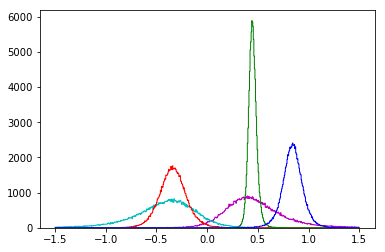

In [301]:
colours = ('b','g','r','c','m')
plt.hist(VectorOfW_matrix, bins = 'auto', range = (-1.5,1.5), histtype = 'step', color = colours)
plt.show()

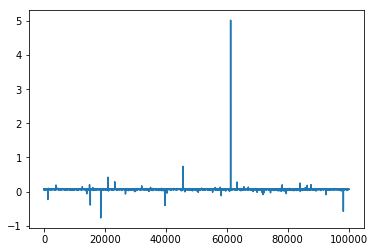

In [302]:
plt.plot(std_vector)
plt.show()


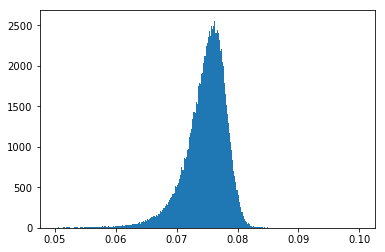

In [303]:
plt.hist(std_vector, bins ='auto',range = (0.05,0.1))
plt.show()